In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize


In [2]:
df = pd.read_csv('D:\Chools\Day_19\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

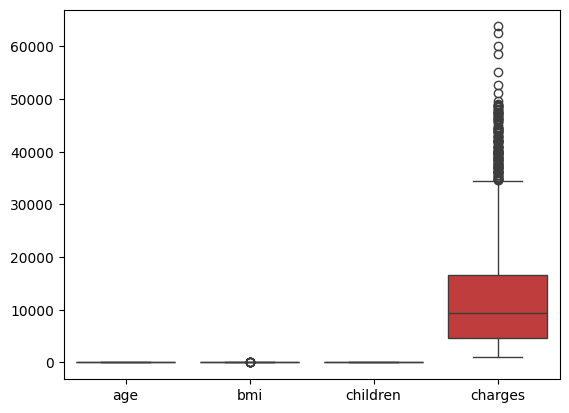

In [5]:
sns.boxplot(df)

In [6]:
df['charges'] = np.log1p(df['charges'])

In [7]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"])

In [8]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,True,False,False,True,False,False,False,True
1,18,33.770,1,7.453882,False,True,True,False,False,False,True,False
2,28,33.000,3,8.400763,False,True,True,False,False,False,True,False
3,33,22.705,0,9.998137,False,True,True,False,False,True,False,False
4,32,28.880,0,8.260455,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,False,True,True,False,False,True,False,False
1334,18,31.920,0,7.699381,True,False,True,False,True,False,False,False
1335,18,36.850,0,7.396847,True,False,True,False,False,False,True,False
1336,21,25.800,0,7.605365,True,False,True,False,False,False,False,True


In [9]:
X = df.drop(columns=["charges"])
y = df["charges"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(1))


In [13]:
model.compile(optimizer='adam', loss='mse')


In [14]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [15]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 43.6566
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 3.0899
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8449
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3564
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0069
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.7407
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5373
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2396
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1993
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2228
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 13/100
34/34 [================

In [16]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

9/9 [==============================] - 0s 956us/step
Mean Squared Error: 0.1469034549334003


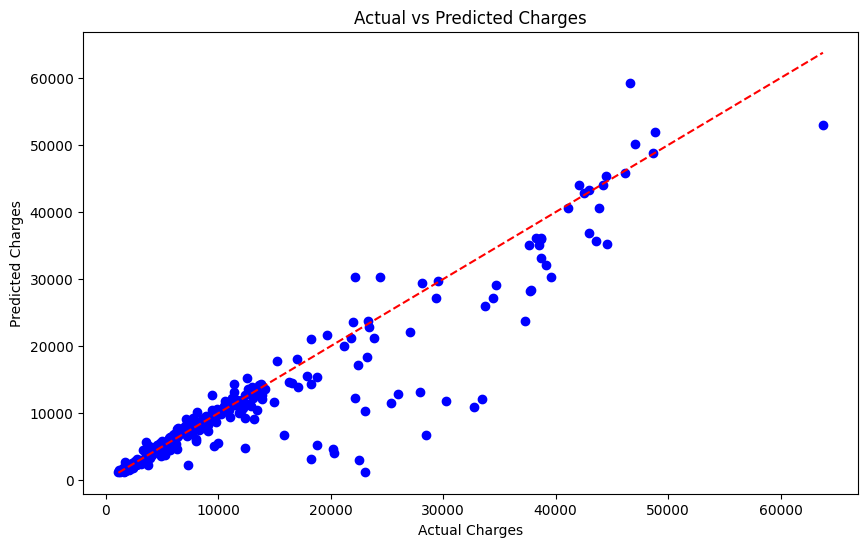

In [17]:
y_pred_inverse = np.expm1(y_pred.flatten())  
y_test_inverse = np.expm1(y_test.values)  

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inverse, y_pred_inverse, color='blue')
plt.plot([min(y_test_inverse), max(y_test_inverse)], [min(y_test_inverse), max(y_test_inverse)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

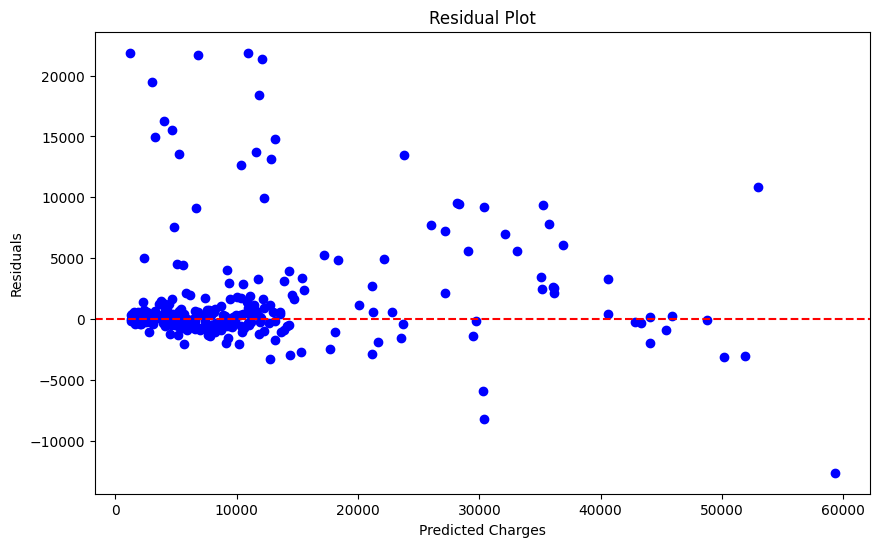

In [18]:
residuals = y_test_inverse - y_pred_inverse

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_inverse, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()